# Introduction

This study provides a comprehensive analysis of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It delves into the factors contributing to these accidents and their impact on fatalities in the region. Focusing on North Rhine-Westphalia, the research aims to uncover patterns and potential causal links between traffic incidents and deaths. The goal is to offer insights into the effectiveness of traffic safety measures, understand accident and mortality trends, and propose strategies to reduce the occurrence and severity of road accidents. Ultimately, this study aims to enhance traffic safety and save lives in North Rhine-Westphalia by informing practical and effective safety intervention

## DataSources

Here is a short listing of datasources

Datasource1 : Number of accidents by location - Country - Month

Link : https://www.govdata.de/ckan/dataset/anzahl-der-unfalle-nach-ortslage-land-monat.rdf

Datasource2 : Deaths by sex and selected causes of death (84) - independent cities and districts - year

Link : https://www.govdata.de/ckan/dataset/gestorbene-nach-geschlecht-und-ausgewahltentodesursachen-84-kreisfreie-stadte-und-kreise-jahr.rdf

## Data Pipeline

Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data.

Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization



## Results 





## Conclusion


The study conducts a detailed examination of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It investigates contributing factors to these accidents and their impact on fatalities. By identifying patterns and potential causal links, the research evaluates the effectiveness of traffic safety measures and trends in accidents and mortality. The ultimate objective is to propose strategies to reduce road accidents and their severity, thereby enhancing traffic safety and saving lives in North Rhine-Westphalia through informed and practical safety interventions.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\4110527353.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## DataSet Loading


In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "data", "accidentdata.sqlite")
conn = sqlite3.connect(Sqlfilepath1)
print(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM accidentdata;"
accident_df = pd.read_sql_query(query, conn)
print(accident_df)

Sqlfilepath2 = os.path.join(os.getcwd(), "data", "deathdata.sqlite")
conn = sqlite3.connect(Sqlfilepath2)
print(Sqlfilepath2)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM deathdata;"
death_df = pd.read_sql_query(query, conn)
print(death_df)


# Close the connection
conn.close()

c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\data\accidentdata.sqlite
     year      Month  Insgesamt  innerorts  außerorts (ohne Autobahnen)  \
0    2023     Januar       5535       3980                         1090   
1    2023    Februar       5041       3645                          998   
2    2023       März       5630       4080                         1112   
3    2023      April       5300       3823                         1034   
4    2023        Mai       5545       3998                         1160   
..    ...        ...        ...        ...                          ...   
369  1995  September       9596       6476                         2229   
370  1995    Oktober       9333       6419                         2128   
371  1995   November       8927       6078                         2062   
372  1995   Dezember       7945       5258                         1812   
373  1995  Insgesamt     106548      71792                        25015   

 

In [3]:
print(accident_df.head(5))
print(death_df.head(5))


   year    Month  Insgesamt  innerorts  außerorts (ohne Autobahnen)  \
0  2023   Januar       5535       3980                         1090   
1  2023  Februar       5041       3645                          998   
2  2023     März       5630       4080                         1112   
3  2023    April       5300       3823                         1034   
4  2023      Mai       5545       3998                         1160   

   auf Autobahnen  
0             465  
1             398  
2             438  
3             443  
4             387  
   year  numberid                 city     citycode  \
0  1998         5  Nordrhein-Westfalen      A00-U49   
1  1998         5  Nordrhein-Westfalen      A00-B99   
2  1998         5  Nordrhein-Westfalen  A15-A19,B90   
3  1998         5  Nordrhein-Westfalen          A39   
4  1998         5  Nordrhein-Westfalen      B15-B19   

                                      accidentType   Total   Male  Female  
0                                        Insge

## Data Cleaning

In [55]:
# Filter only Month, Year, and Total accident records
columns_to_keep = ['Month', 'year','Insgesamt']
New_Accident_df = accident_df[columns_to_keep]
filtered_df = New_Accident_df[New_Accident_df['Month'] == 'Insgesamt']
print(filtered_df)


         Month  year  Insgesamt
22   Insgesamt  2022      79786
35   Insgesamt  2021      69819
48   Insgesamt  2020      68258
61   Insgesamt  2019      77557
74   Insgesamt  2018      78472
87   Insgesamt  2017      76579
100  Insgesamt  2016      76540
113  Insgesamt  2015      72356
126  Insgesamt  2014      73980
139  Insgesamt  2013      75785
152  Insgesamt  2012      79572
165  Insgesamt  2011      82615
178  Insgesamt  2010      80562
191  Insgesamt  2009      86727
204  Insgesamt  2008      89391
217  Insgesamt  2007      94735
230  Insgesamt  2006      91081
243  Insgesamt  2005      93797
256  Insgesamt  2004      95948
269  Insgesamt  2003      97234
282  Insgesamt  2002      98994
295  Insgesamt  2001     102789
308  Insgesamt  2000     103812
321  Insgesamt  1999     106740
334  Insgesamt  1998     102135
347  Insgesamt  1997     102555
360  Insgesamt  1996     100557
373  Insgesamt  1995     106548


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\3535793002.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\3535793002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

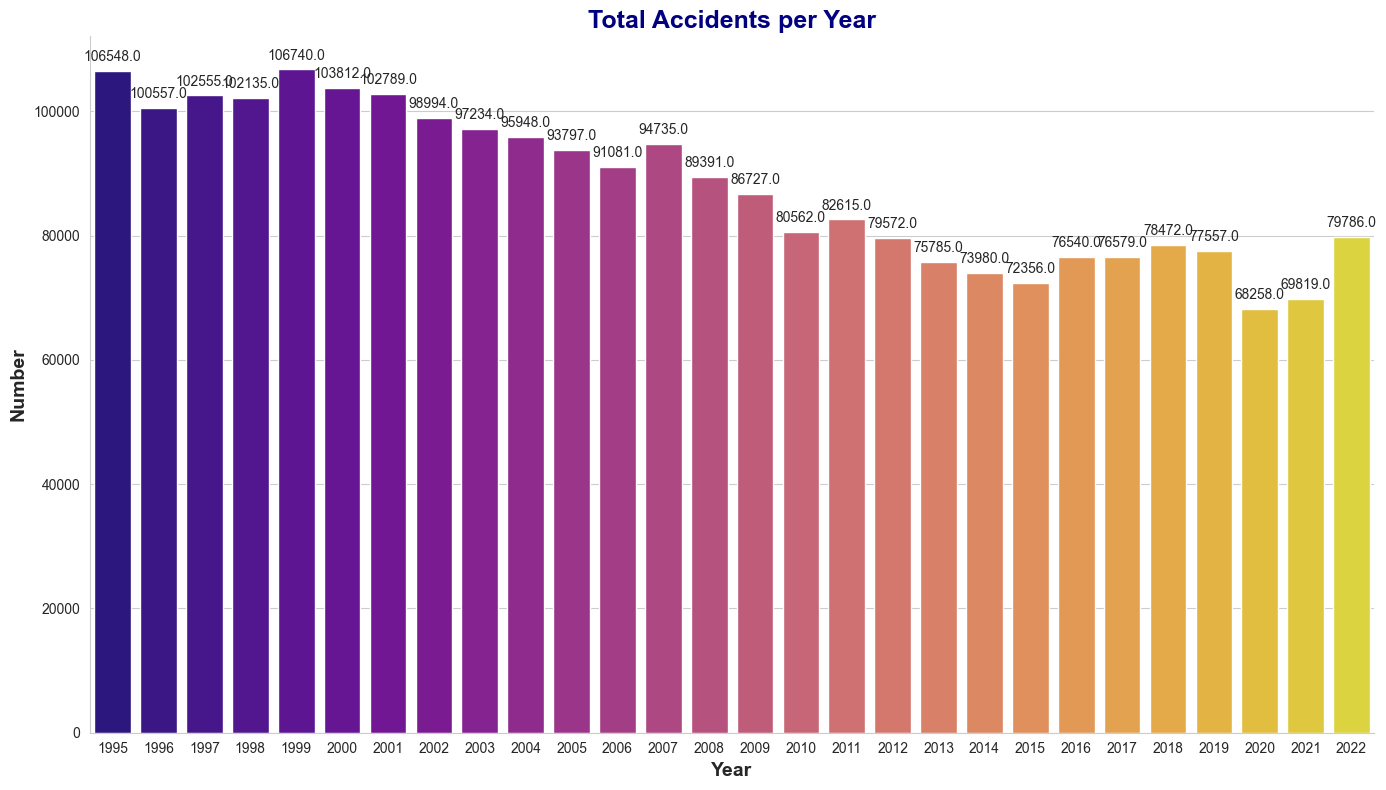

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Insgesamt' is a numeric type if it's not
# filtered_df['Insgesamt'] = pd.to_numeric(filtered_df['Insgesamt'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)

plt.title('Total Accidents per Year', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()


In [53]:
# Filter only Year, City, and Total death records in Nordrhein-Westfalen city
columns_to_keep_death = ['year', 'city','accidentType','Total','Female','Male']
New_death_df = death_df[columns_to_keep_death]
filtered_death_df = New_death_df[New_death_df['city'] == 'Nordrhein-Westfalen']

filtered_death_df_Total = filtered_death_df[filtered_death_df['accidentType'] == 'Insgesamt']
# filtered_death_df_Total = filtered_death_df_Total.rename(columns=[])
filtered_death_df_Total.rename(columns={'Total': 'Insgesamt'}, inplace=True)

print(filtered_death_df_Total)

        year                 city accidentType Insgesamt  Female    Male
0       1998  Nordrhein-Westfalen    Insgesamt    189147  101642   87505
5124    1999  Nordrhein-Westfalen    Insgesamt    188851  101528   87323
10248   2000  Nordrhein-Westfalen    Insgesamt    187736  100474   87262
15372   2001  Nordrhein-Westfalen    Insgesamt    184824   99278   85546
20496   2002  Nordrhein-Westfalen    Insgesamt    188333  101242   87091
25620   2003  Nordrhein-Westfalen    Insgesamt    190793  101855   88938
30744   2004  Nordrhein-Westfalen    Insgesamt    184449   97807   86642
35868   2005  Nordrhein-Westfalen    Insgesamt    186427   98604   87823
40992   2006  Nordrhein-Westfalen    Insgesamt    183741   97192   86549
46116   2007  Nordrhein-Westfalen    Insgesamt    184954   96920   88034
51240   2008  Nordrhein-Westfalen    Insgesamt    189586   99949   89637
56364   2009  Nordrhein-Westfalen    Insgesamt    190814  100134   90680
61488   2010  Nordrhein-Westfalen    Insgesamt    1

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\1863630301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_death_df_Total.rename(columns={'Total': 'Insgesamt'}, inplace=True)


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\2122183164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Insgesamt', data=filtered_death_df_Total, palette='plasma')  # ci=None will remove the confidence interval bars
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

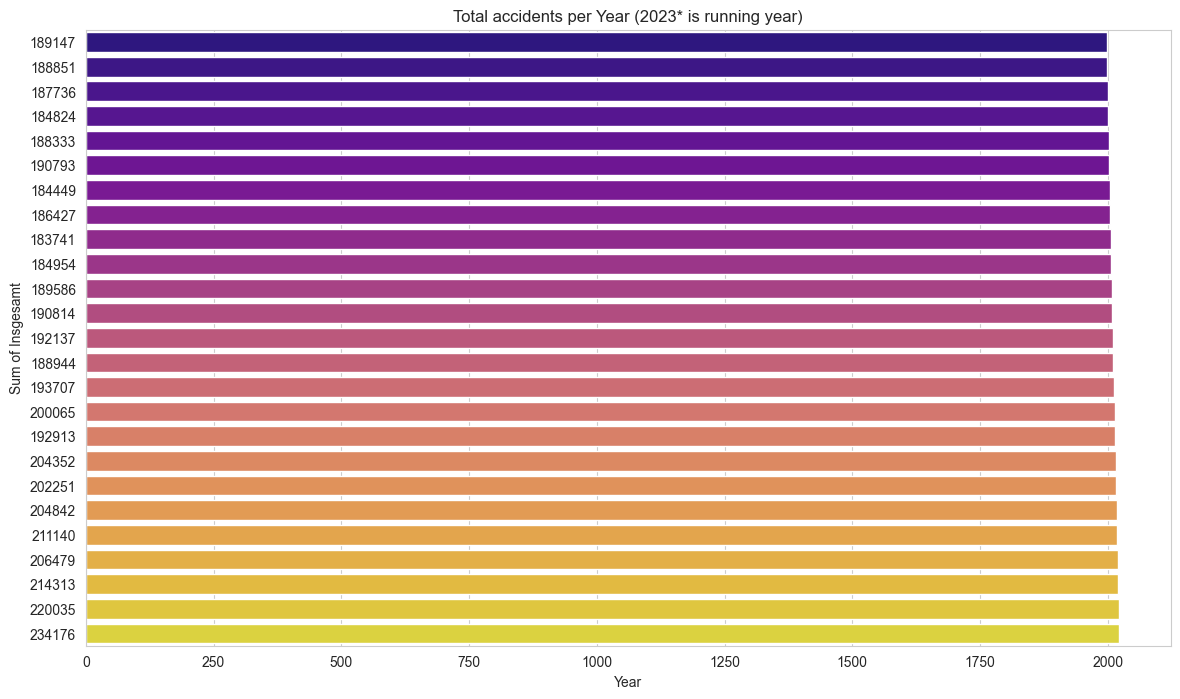

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Insgesamt' is a numeric type if it's not
# New_Accident_df['Insgesamt'] = pd.to_numeric(New_Accident_df['Insgesamt'], errors='coerce')

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
# sns.barplot(x='year', y='Total', data=filtered_death_df_Total, palette='plasma', ci=None)  # ci=None will remove the confidence interval bars
sns.barplot(x='year', y='Insgesamt', data=filtered_death_df_Total, palette='plasma')  # ci=None will remove the confidence interval bars
plt.title('Total accidents per Year (2023* is running year)')
plt.xlabel('Year')
plt.ylabel('Sum of Insgesamt')
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\2476661522.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_death_df_Total, estimator=sum, palette='plasma', ci=None)
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_29536\2476661522.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_death_df_Total, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  

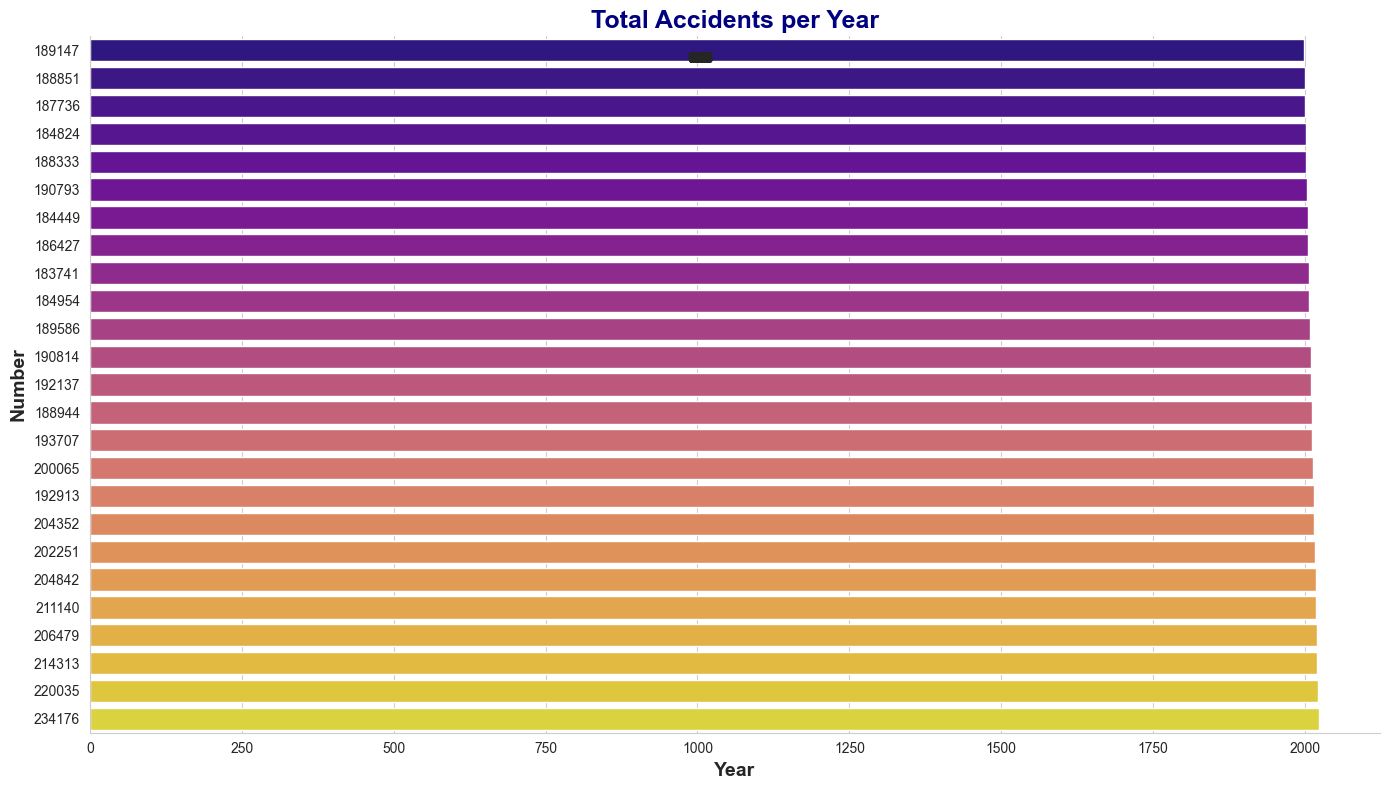

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Insgesamt' is a numeric type if it's not
# filtered_df['Insgesamt'] = pd.to_numeric(filtered_df['Insgesamt'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_death_df_Total, estimator=sum, palette='plasma', ci=None)

plt.title('Total Accidents per Year', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()
